In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv('../data/iris.csv')[:100]
df['species'] = LabelEncoder().fit_transform(df['species'])
df['species'] = df['species'].map({0: -1, 1: 1})

In [2]:
X = df.drop(['species'], axis=1).to_numpy()
y = df['species'].to_numpy()
X.shape, y.shape

((100, 4), (100,))

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Функция визуализации

In [13]:
from sklearn.decomposition import PCA

def plot_result(X, y, model):
    pca = PCA(n_components=2)
    X_reduced = pca.fit_transform(X)

    plt.figure(figsize=(10, 6))
    plt.scatter(X_reduced[y == 1, 0], X_reduced[y == 1, 1], color='red', label='1', alpha=0.7)
    plt.scatter(X_reduced[y == -1, 0], X_reduced[y == -1, 1], color='blue', label='-1', alpha=0.7)

    X_sup_reduced = pca.transform(model.sup_vec)
    plt.scatter(X_sup_reduced[:, 0], X_sup_reduced[:, 1], facecolors='black', edgecolors='k', s=100, label='Опорные векторы')

    point = pca.transform(model.weights[None, :])
    x = float(point[0][0])
    y = float(point[0][1])
    b = model.b
    k = (y - b) / x
    x = [-3, 2]
    y = [_ * k for _ in x]
    plt.plot(x, y, color='black')

    plt.title('Результат классификации')
    plt.legend(loc='best')
    plt.show()

Линейный классификатор

Время: 0.12 сек.
Accuracy: 1.0


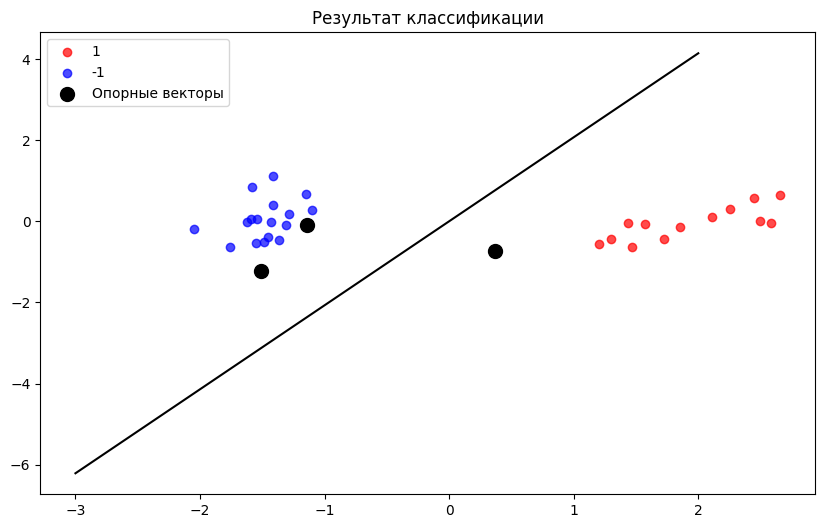

In [14]:
from SVM import SVM
from sklearn.metrics import accuracy_score
from time import time

start = time()
model = SVM(kernel='linear')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f'Время: {np.round(time()-start, 2)} сек.\nAccuracy: {np.round(accuracy_score(y_test, y_pred), 2)}')
plot_result(X_test, y_test, model)

C RBF ядром:

In [6]:
start = time()
model = SVM(kernel='RBF')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f'Время: {np.round(time()-start, 2)} сек.\nAccuracy: {np.round(accuracy_score(y_test, y_pred), 2)}')

Время: 59.45 сек.
Accuracy: 1.0


С полиномиальным ядром:

In [12]:
start = time()
model = SVM(kernel='polynomial')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f'Время: {np.round(time()-start, 2)} сек.\nAccuracy: {np.round(accuracy_score(y_test, y_pred), 2)}')

Время: 6.1 сек.
Accuracy: 1.0


Эталонное решение:

Линейное ядро

In [8]:
from sklearn.svm import SVC

start = time()
model = SVC(kernel='linear', random_state=42, C=1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f'Время: {np.round(time()-start, 3)} сек.\nAccuracy: {np.round(accuracy_score(y_test, y_pred), 2)}')

Время: 0.004 сек.
Accuracy: 1.0


RBF ядро

In [9]:
start = time()
model = SVC(kernel='rbf', random_state=42, C=1, gamma=0.25)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f'Время: {np.round(time()-start, 3)} сек.\nAccuracy: {np.round(accuracy_score(y_test, y_pred), 2)}')

Время: 0.005 сек.
Accuracy: 1.0


Полиномиальное ядро

In [10]:
start = time()
model = SVC(kernel='poly', random_state=42, C=1, degree=3)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f'Время: {np.round(time()-start, 3)} сек.\nAccuracy: {np.round(accuracy_score(y_test, y_pred), 2)}')

Время: 0.005 сек.
Accuracy: 1.0
